# Boost of Power

Add some power to your fraud detection algorithm by using a GradientTreeClassifier to leverage ensemble learning.

In [4]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [5]:
# Loading data
file_path = (r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 11\2\08-Stu_Gradient_Boosted_Tree\Resources\sba_loans_encoded.csv")
df_transactions = pd.read_csv(file_path)
df_transactions.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define features set
X = df_transactions.copy()
X.drop("Default", axis=1, inplace=True)
X.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Define target vector
y = df_transactions["Default"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [11]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose Optimal Learning Rate

In [12]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=learning_rate,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)
    
    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled, 
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled, 
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.679
Accuracy score (validation): 0.655

Learning rate:  0.1
Accuracy score (training): 0.679
Accuracy score (validation): 0.655

Learning rate:  0.25
Accuracy score (training): 0.697
Accuracy score (validation): 0.655

Learning rate:  0.5
Accuracy score (training): 0.702
Accuracy score (validation): 0.651

Learning rate:  0.75
Accuracy score (training): 0.704
Accuracy score (validation): 0.651

Learning rate:  1
Accuracy score (training): 0.704
Accuracy score (validation): 0.653



### Build Model with Optimal Learning Rate

In [14]:
# Create GradientBoostingClassifier model
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())


# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled, 
        y_test)))

Accuracy score (training): 0.704
Accuracy score (validation): 0.653


In [16]:
# Make predictions
predictions = classifier.predict(X_test)

# Generate accuracy score for predictions using y_test
acc = accuracy_score(y_test, predictions)

print(f"Accuracy score: {acc}")

Accuracy score: 0.6552380952380953


### Model Evaluation

In [17]:
# Generatring the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])

cm_df

,Pred 0,Pred 1
Actual 0,344,0
Actual 1,181,0


In [18]:
# Generate classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       344
           1       0.00      0.00      0.00       181

    accuracy                           0.66       525
   macro avg       0.33      0.50      0.40       525
weighted avg       0.43      0.66      0.52       525



C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


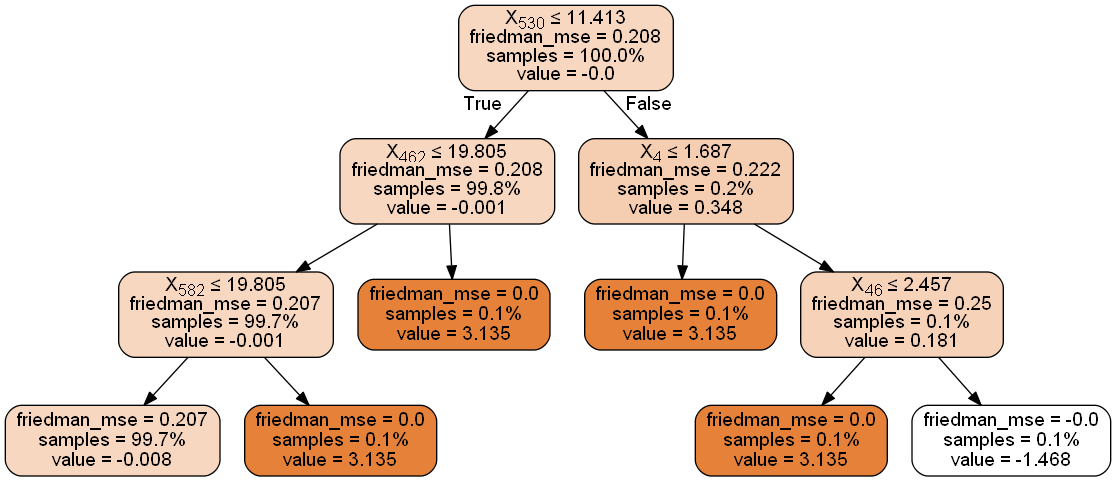

In [21]:
# Graph tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(classifier.estimators_[9, 0],
                                out_file=None, 
                                filled=True,
                                rounded=True,
                                special_characters=True, 
                                proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())